In [2]:
import pandas as pd

In [3]:
df=pd.read_excel('Uber_cleaned_excel.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Request_id           6745 non-null   int64         
 1   Pickup_point         6745 non-null   object        
 2   Driver_id            6745 non-null   int64         
 3   Status               6745 non-null   object        
 4   Request_Date         6745 non-null   datetime64[ns]
 5   Request_Time         6745 non-null   object        
 6   Time_Slot            6745 non-null   object        
 7   Drop_Date            2831 non-null   datetime64[ns]
 8   Drop_Time            2831 non-null   object        
 9   Trip_Duration(mins)  6745 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 527.1+ KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

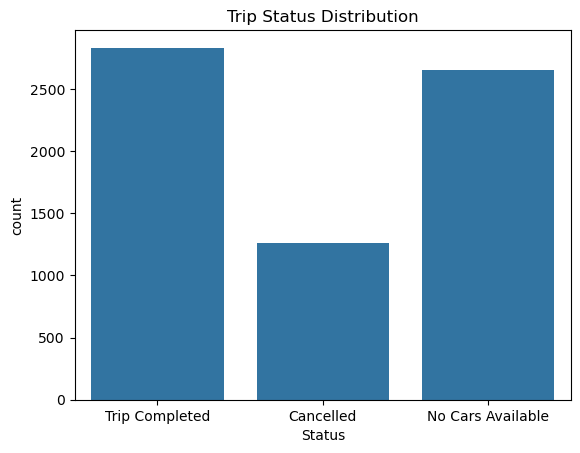

In [6]:
sns.countplot(data=df, x='Status')
plt.title("Trip Status Distribution")
plt.show()

### **Trip Status Insights**

#### Less than half of trips have completed successfully as compared to total request

#### A significant number of requests are either cancelled or never assigned a driver, indicating inefficiencies in operations.

#### More cars must be encouraged to collab with Uber

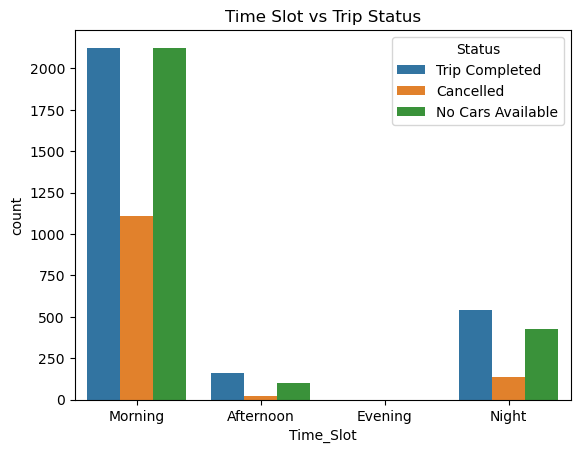

In [7]:
sns.countplot(data=df, x='Time_Slot', hue='Status', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Time Slot vs Trip Status")
plt.show()

### **Trip Status Trends Across Different Time Slots**

#### Evening slots have almost zero trips. Suggesting this slot has the least demand.

#### Morning hours see the highest traffic, better driver avilability would impact significantly to increase number of succesfull trips.

#### Attracting and connecting with more drivers is the key to meet demand (specially in Morning and Night Slots).

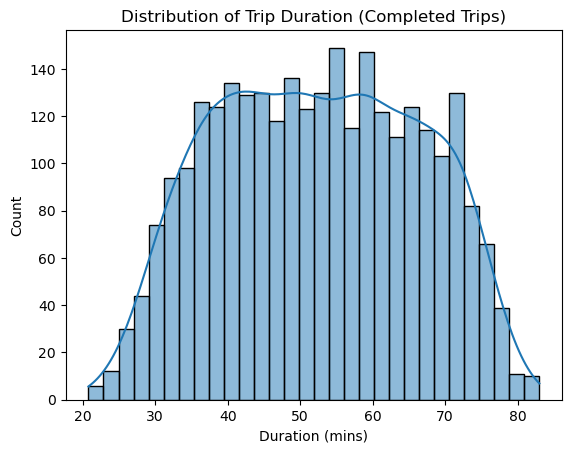

In [8]:
sns.histplot(df[df['Status'] == 'Trip Completed']['Trip_Duration(mins)'], bins=30, kde=True)
plt.title("Distribution of Trip Duration (Completed Trips)")
plt.xlabel("Duration (mins)")
plt.show()

### **Trip Duration Distribution**

#### Most trip durations fall between 40–60 minutes.


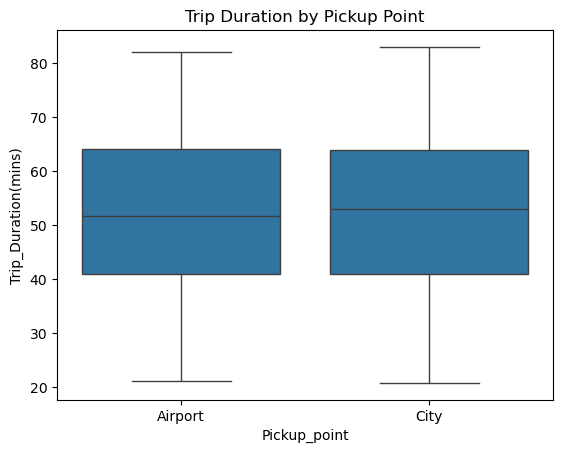

In [10]:
sns.boxplot(data=df[df['Status'] == 'Trip Completed'], x='Pickup_point', y='Trip_Duration(mins)')
plt.title("Trip Duration by Pickup Point")
plt.show()

### **Trip Duration by Pickup Point**

#### Trip duration is slightly longer when the pickup is from the Airport 

#### Since the spread is very similar, pickup location does not strongly affect variability in trip duration. Both are fairly consistent.

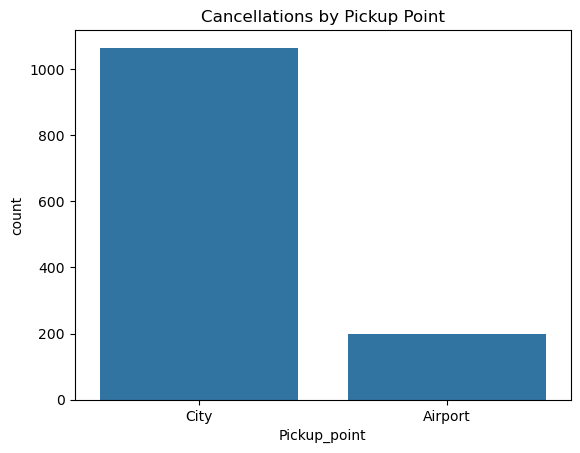

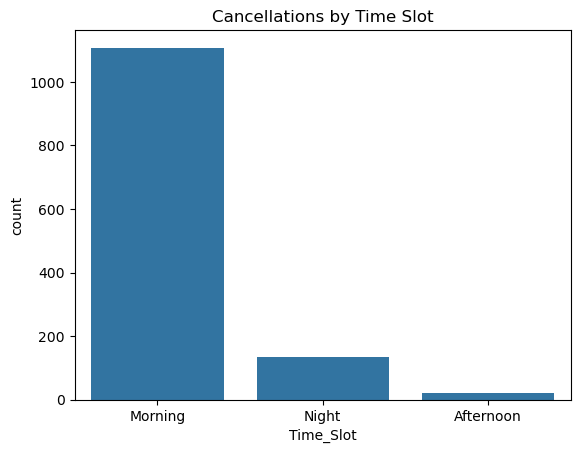

In [6]:
cancelled = df[df['Status'] == 'Cancelled']


# Cancellations by pickup
sns.countplot(data=cancelled, x='Pickup_point')
plt.title("Cancellations by Pickup Point")
plt.show()

# Cancellations by time slot
sns.countplot(data=cancelled, x='Time_Slot')
plt.title("Cancellations by Time Slot")
plt.show()

### **Cancellations over Time_Slot and Pick-up Point**

#### Morning slot has by far the highest number of cancellations, probably due to rush hours and high demand leading to unavailability.

#### Airport pickups are more reliable

In [16]:
df['DayOfWeek'] = df['Request_Date'].dt.day_name()

<Axes: xlabel='DayOfWeek', ylabel='count'>

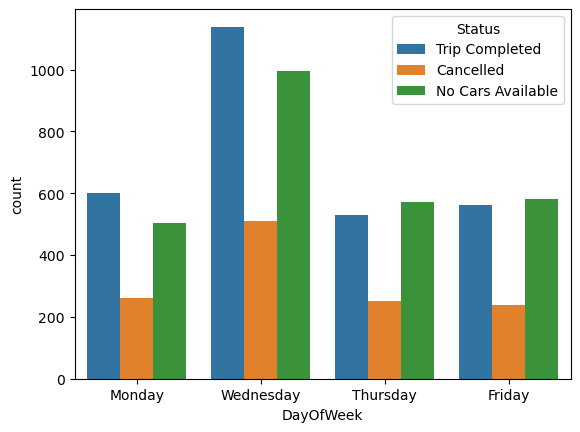

In [17]:
sns.countplot(data=df, x='DayOfWeek', hue='Status')

### **Cancellation Patterns**

#### Both Trip Completed & No Cars Available are highest on Wednesday, indicating significant demand exceeding supply.

#### On Thursday and Friday, the number of Trip Completed, Cancelled, and No Cars Available are more evenly distributed compared to other days

<Axes: xlabel='Pickup_point'>

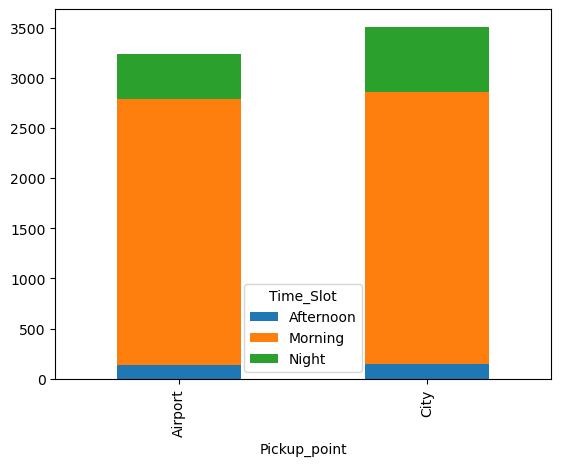

In [20]:
pickup_time_group = df.groupby(['Pickup_point', 'Time_Slot'])['Request_id'].count().unstack()
pickup_time_group.plot(kind='bar', stacked=True)

### **Pickup Point vs Time Slot Demand**

#### Morning is the most frequent time slot for both Airport and City pickups

#### Both locations show a small volume of rides in the Afternoon, which could reflect off-peak hours for travel.